In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

from scipy.special import erf

In [2]:
df = pd.read_csv('data/teen_phone_addiction_dataset.csv')
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [3]:
N = 18
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']

col = cols[N % 7]
print(col)

feat = df[col]
feat.head()

Time_on_Social_Media


0    3.6
1    1.1
2    0.3
3    3.1
4    2.6
Name: Time_on_Social_Media, dtype: float64

## Задание 1

In [4]:
def print_stats(feat):
    """
    Полная функция для расчета статистических характеристик и построения графиков
    """
    print("="*60)
    print(f"СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для {feat.name}")
    print("="*60)
    
    print(f"Среднее:                    {feat.mean():.4f}")
    print(f"Дисперсия:                  {feat.var():.4f}")
    print(f"Медиана:                    {feat.median():.4f}")
    
    mode_values = feat.mode()
    if len(mode_values) > 0:
        print(f"Мода:                       {mode_values.iloc[0]:.4f}")
    else:
        print(f"Мода:                       отсутствует")
    
    q25 = feat.quantile(0.25)
    q50 = feat.quantile(0.50)
    q75 = feat.quantile(0.75)
    
    print(f"Квантиль 0.25:              {q25:.4f}")
    print(f"Квантиль 0.50 (медиана):    {q50:.4f}")
    print(f"Квантиль 0.75:              {q75:.4f}")
    
    iqr = q75 - q25
    print(f"Интерквартильный размах:    {iqr:.4f}")
    
    print(f"Эксцесс (kurtosis):         {feat.kurtosis():.4f}")
    print(f"Асимметрия (skew):          {feat.skew():.4f}")
    
    print("\n" + "="*60)
    print("ГРАФИКИ")
    print("="*60)
    
    num_bins = int(np.log2(feat.size) + 1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.hist(feat, bins=num_bins, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title(f'Гистограмма: {feat.name}')
    ax1.set_xlabel('Значения')
    ax1.set_ylabel('Частота')
    ax1.grid(True, alpha=0.3)
    
    ax1.axvline(feat.mean(), color='red', linestyle='--', label=f'Среднее: {feat.mean():.2f}')
    ax1.axvline(feat.median(), color='green', linestyle='--', label=f'Медиана: {feat.median():.2f}')
    ax1.legend()
    
    sorted_data = np.sort(feat.dropna())
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    ax2.step(sorted_data, y_values, where='post', color='darkblue', linewidth=2)
    ax2.set_title(f'Эмпирическая функция распределения: {feat.name}')
    ax2.set_xlabel('Значения')
    ax2.set_ylabel('Вероятность P(X ≤ x)')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1)
    
    ax2.axvline(q25, color='orange', linestyle=':', label=f'Q1: {q25:.2f}')
    ax2.axvline(q50, color='green', linestyle=':', label=f'Q2: {q50:.2f}')
    ax2.axvline(q75, color='red', linestyle=':', label=f'Q3: {q75:.2f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для Time_on_Social_Media
Среднее:                    2.4992
Дисперсия:                  0.9765
Медиана:                    2.5000
Мода:                       2.7000
Квантиль 0.25:              1.8000
Квантиль 0.50 (медиана):    2.5000
Квантиль 0.75:              3.2000
Интерквартильный размах:    1.4000
Эксцесс (kurtosis):         -0.2132
Асимметрия (skew):          0.0670

ГРАФИКИ


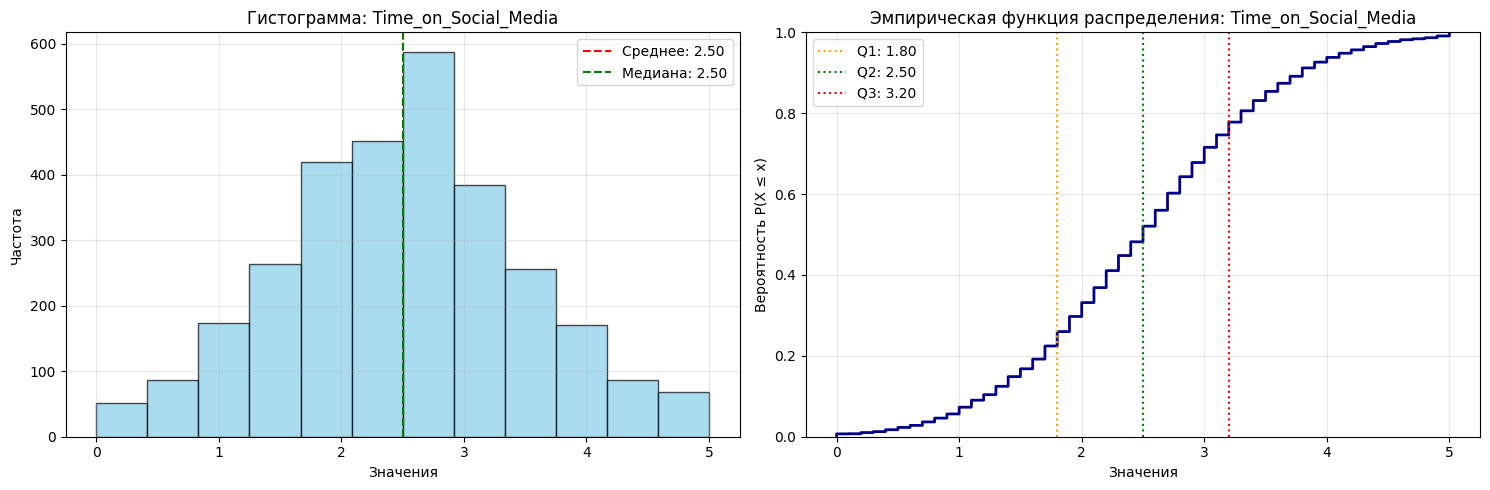

In [5]:
print_stats(feat)

## Задание 2

$$x \sim \mathcal{N}(\mu, \sigma^2) \implies F_X(x) = \Phi\left(\frac{x-\mu}{\sigma}\right) = \frac{1}{2}\left( 1 + erf\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right), \quad x \in \mathbb{R}$$

$$p_i = \mathbb{P}(b_{i-1}\le X < b_{i}) = F_X(b_{i}) - F_X(b_{i-1}), \quad i=\overline{1,n}$$

$$E_i = N \cdot p_i > 5, \quad i=\overline{1,n}$$

$$\chi^2 = \sum_{i=1}^n \frac{(O_i - E_i)^2}{E_i}, \quad E_i > 0$$

In [6]:
def cdf_normal(mu, sigma, x):
    """
    Функция распределения нормального распределения N(mu, sigma²)
    """
    z = (x - mu) / sigma
    return 0.5 * (1 + erf(z / np.sqrt(2)))


def histogram(data, k=None):
    """
    Создает гистограмму с k интервалами
    Если k не задано, использует правило Стерджеса: k = 1 + [log2(n)]
    """
    if k is None:
        k = int(1 + np.log2(len(data)))
    
    min_val = np.min(data)
    max_val = np.max(data)
    
    bin_edges = np.linspace(min_val, max_val, k + 1)
    bin_counts, _ = np.histogram(data, bins=bin_edges)
    
    return np.array(bin_counts), np.array(bin_edges)


def expected_frequencies_normal(data, mu, sigma):
    """
    Вычисляет ожидаемые частоты для нормального распределения
    """
    n = len(data)
    observed_freq, bin_edges = histogram(data)
    expected_freq = []
    
    for i in range(len(bin_edges) - 1):
        left = bin_edges[i]
        right = bin_edges[i + 1]
        
        # Вероятность попадания в [left, right)
        p_left = cdf_normal(mu, sigma, left)
        p_right = cdf_normal(mu, sigma, right)
        prob_interval = p_right - p_left
        
        expected_freq.append(round(n * prob_interval))
    
    return np.array(expected_freq), observed_freq


def chi_square_statistic(observed_freq, expected_freq):
    """
    Вычисляет статистику хи-квадрат
    """
    chi_sq = 0
    
    for i in range(len(observed_freq)):
        if expected_freq[i] > 0:
            chi_sq += (observed_freq[i] - expected_freq[i])**2 / expected_freq[i]
    
    return chi_sq

In [7]:
def chi_square_normality_test(data, alpha=0.05):
    """
    Критерий хи-квадрат для проверки нормальности
    """
    print("="*60)
    print("КРИТЕРИЙ ХИ-КВАДРАТ")
    print("="*60)
    
    n = len(data)
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    
    print(f"Размер выборки: {n}")
    print(f"Выборочное среднее mu: {mu:.4f}")
    print(f"Выборочное стандартное отклонение sigma: {sigma:.4f}")
    
    expected_freq, observed_freq = expected_frequencies_normal(data, mu, sigma)
    
    min_freq = 5
    combined_obs = []
    combined_exp = []
    
    current_obs = 0
    current_exp = 0
    
    for i in range(len(observed_freq)):
        current_obs += observed_freq[i]
        current_exp += expected_freq[i]
        
        if current_exp >= min_freq or i == len(observed_freq) - 1:
            combined_obs.append(current_obs)
            combined_exp.append(current_exp)
            current_obs = 0
            current_exp = 0
    
    final_observed = np.array(combined_obs)
    final_expected = np.array(combined_exp)
    
    print(f"\nКоличество интервалов после объединения: {len(final_observed)}")
    print(f"Наблюдаемые частоты: {final_observed}")
    print(f"Ожидаемые частоты: {final_expected.round(2)}")
    
    chi_sq = chi_square_statistic(final_observed, final_expected)
    
    # Степени свободы = количество интервалов - 1 - количество оцененных параметров (2)
    df = len(final_observed) - 1 - 2
    
    print(f"\nСтатистика хи-квадрат: {chi_sq:.4f}")
    print(f"Степени свободы: {df}")
    
    if df <= 0:
        print("Недостаточно степеней свободы для проведения теста")
        return None
    
    critical_value = stats.chi2.ppf(1 - alpha, df)
    p_value = 1 - stats.chi2.cdf(chi_sq, df)
    
    print(f"Критическое значение (alpha={alpha}): {critical_value:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    is_normal = chi_sq <= critical_value
    print(f"\nРезультат: ", end="")
    if is_normal:
        print("Данные согласуются с нормальным распределением")
    else:
        print("Данные НЕ согласуются с нормальным распределением")
    
    return {
        'chi_square': chi_sq,
        'degrees_of_freedom': df,
        'p_value': p_value,
        'critical_value': critical_value,
        'is_normal': is_normal
    }


In [8]:
result_chi2 = chi_square_normality_test(feat)

КРИТЕРИЙ ХИ-КВАДРАТ
Размер выборки: 3000
Выборочное среднее mu: 2.4992
Выборочное стандартное отклонение sigma: 0.9882

Количество интервалов после объединения: 12
Наблюдаемые частоты: [ 52  86 174 264 419 451 588 384 256 171  87  68]
Ожидаемые частоты: [ 35  85 172 290 412 490 490 411 290 171  85  35]

Статистика хи-квадрат: 70.3675
Степени свободы: 9
Критическое значение (alpha=0.05): 16.9190
p-value: 0.0000

Результат: Данные НЕ согласуются с нормальным распределением


In [9]:
def skewness_kurtosis_normality_test(data, alpha=0.05):
    """
    Проверка нормальности по критериям асимметрии и эксцесса
    """
    
    clean_data = data.dropna()
    n = len(clean_data)
    
    skewness = clean_data.skew()
    kurt = clean_data.kurtosis()  # excess kurtosis (kurtosis - 3)
    
    print("="*60)
    print("ПРОВЕРКА НОРМАЛЬНОСТИ ПО АСИММЕТРИИ И ЭКСЦЕССУ")
    print("="*60)
    print(f"Размер выборки: {n}")
    print(f"Асимметрия (skewness): {skewness:.4f}")
    print(f"Эксцесс (kurtosis): {kurt:.4f}")
    
    se_skewness = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
    se_kurtosis = np.sqrt(24 * n * (n - 2) * (n - 3) / ((n + 1)**2 * (n + 3) * (n + 5)))
    
    print(f"Стандартная ошибка асимметрии: {se_skewness:.4f}")
    print(f"Стандартная ошибка эксцесса: {se_kurtosis:.4f}")
    
    z_skewness = skewness / se_skewness
    z_kurtosis = kurt / se_kurtosis
    
    print(f"Z-статистика для асимметрии: {z_skewness:.4f}")
    print(f"Z-статистика для эксцесса: {z_kurtosis:.4f}")
    
    z_critical = stats.norm.ppf(1 - alpha/2)
    print(f"Критическое значение Z (alpha={alpha}): ±{z_critical:.4f}")
    
    # Проверка гипотез
    skewness_normal = abs(z_skewness) <= z_critical
    kurtosis_normal = abs(z_kurtosis) <= z_critical
    both_normal = skewness_normal and kurtosis_normal
    
    print(f"\nРезультаты:")
    print(f"Асимметрия: {'Соответствует нормальному распределению' if skewness_normal else 'НЕ соответствует нормальному распределению'}")
    print(f"Эксцесс: {'Соответствует нормальному распределению' if kurtosis_normal else 'НЕ соответствует нормальному распределению'}")
    print(f"Общий вывод: {'Данные согласуются с нормальным распределением' if both_normal else 'Данные НЕ согласуются с нормальным распределением'}")
    
    p_skewness = 2 * (1 - stats.norm.cdf(abs(z_skewness)))
    p_kurtosis = 2 * (1 - stats.norm.cdf(abs(z_kurtosis)))
    
    print(f"\np-values:")
    print(f"Асимметрия: {p_skewness:.4f}")
    print(f"Эксцесс: {p_kurtosis:.4f}")
    
    return {
        'skewness': skewness,
        'kurtosis': kurt,
        'z_skewness': z_skewness,
        'z_kurtosis': z_kurtosis,
        'p_skewness': p_skewness,
        'p_kurtosis': p_kurtosis,
        'skewness_normal': skewness_normal,
        'kurtosis_normal': kurtosis_normal,
        'is_normal': both_normal,
        'conclusion': 'Нормальное' if both_normal else 'Не нормальное'
    }


In [10]:
result_sk = skewness_kurtosis_normality_test(feat)

ПРОВЕРКА НОРМАЛЬНОСТИ ПО АСИММЕТРИИ И ЭКСЦЕССУ
Размер выборки: 3000
Асимметрия (skewness): 0.0670
Эксцесс (kurtosis): -0.2132
Стандартная ошибка асимметрии: 0.0447
Стандартная ошибка эксцесса: 0.0892
Z-статистика для асимметрии: 1.4991
Z-статистика для эксцесса: -2.3899
Критическое значение Z (alpha=0.05): ±1.9600

Результаты:
Асимметрия: Соответствует нормальному распределению
Эксцесс: НЕ соответствует нормальному распределению
Общий вывод: Данные НЕ согласуются с нормальным распределением

p-values:
Асимметрия: 0.1339
Эксцесс: 0.0169


In [11]:
def plot_qq_normal(data):
    """
    Построение Q-Q plot для проверки нормальности
    
    Parameters:
    data: Series - исследуемые данные
    """
    
    clean_data = data.dropna().sort_values()
    n = len(clean_data)
    
    print("="*60)
    print("Q-Q PLOT ДЛЯ ПРОВЕРКИ НОРМАЛЬНОСТИ")
    print("="*60)
        
    positions = (np.arange(1, n + 1) - 0.5) / n
    theoretical_quantiles = stats.norm.ppf(positions)
    
    sample_mean = clean_data.mean()
    sample_std = clean_data.std(ddof=1)
    standardized_data = (clean_data - sample_mean) / sample_std
    
    plt.figure(figsize=(10, 8))
    
    plt.scatter(theoretical_quantiles, standardized_data, alpha=0.6, color='blue', s=20)
    
    min_val = min(theoretical_quantiles.min(), standardized_data.min())
    max_val = max(theoretical_quantiles.max(), standardized_data.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r-', linewidth=2, label='Идеальная нормальность (y=x)')
    
    se = 1.36 / np.sqrt(n)
    upper_bound = theoretical_quantiles + 1.96 * se
    lower_bound = theoretical_quantiles - 1.96 * se
    
    plt.plot(theoretical_quantiles, upper_bound, 'g--', alpha=0.7, linewidth=1, label='95% доверительный интервал')
    plt.plot(theoretical_quantiles, lower_bound, 'g--', alpha=0.7, linewidth=1)
    
    plt.xlabel('Теоретические квантили (стандартное нормальное распределение)')
    plt.ylabel('Выборочные квантили (стандартизованные)')
    plt.title(f'Q-Q Plot: {data.name}\nПроверка на нормальность')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    correlation = np.corrcoef(theoretical_quantiles, standardized_data)[0, 1]
    
    plt.text(0.05, 0.95, f'Корреляция: {correlation:.4f}\n(близко к 1 = нормальность)', 
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print(f"Коэффициент корреляции между теоретическими и выборочными квантилями: {correlation:.4f}")
    print("\nИнтерпретация Q-Q plot:")
    if correlation > 0.99:
        print("- Очень высокая корреляция (> 0.99): данные очень хорошо соответствуют нормальному распределению")
        qq_conclusion = "Нормальное"
    elif correlation > 0.95:
        print("- Высокая корреляция (0.95-0.99): данные хорошо соответствуют нормальному распределению")
        qq_conclusion = "Нормальное"
    elif correlation > 0.90:
        print("- Умеренная корреляция (0.90-0.95): данные приблизительно соответствуют нормальному распределению")
        qq_conclusion = "Приблизительно нормальное"
    else:
        print("- Низкая корреляция (< 0.90): данные плохо соответствуют нормальному распределению")
        qq_conclusion = "Не нормальное"
    
    
    return {
        'correlation': correlation,
        'conclusion': qq_conclusion
    }


Визуальные признаки нормальности:
- Точки должны лежать близко к красной линии y=x
- Отклонения на краях допустимы
- S-образная кривая указывает на асимметрию
- Выпуклая/вогнутая форма указывает на тяжелые/легкие хвосты

Q-Q PLOT ДЛЯ ПРОВЕРКИ НОРМАЛЬНОСТИ


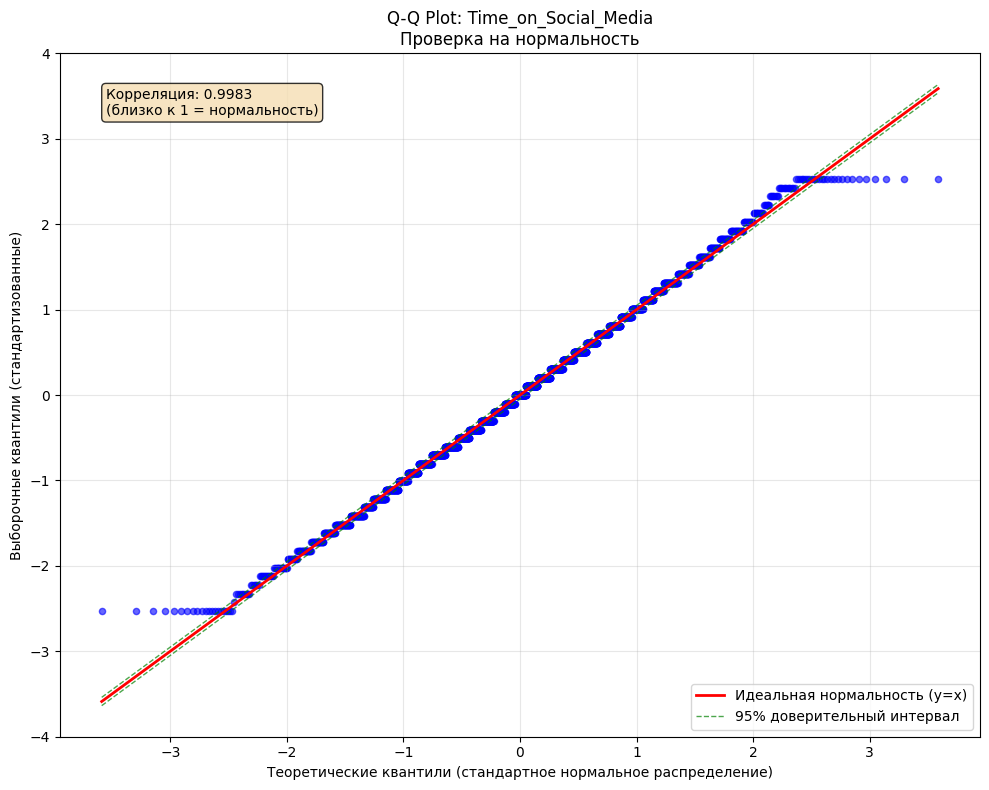

Коэффициент корреляции между теоретическими и выборочными квантилями: 0.9983

Интерпретация Q-Q plot:
- Очень высокая корреляция (> 0.99): данные очень хорошо соответствуют нормальному распределению


In [12]:
qq = plot_qq_normal(feat)

## Задание 3

##### Как видно, распределение признака Time_on_Social_Media визуально схоже с нормальным. При этом некоторые из реализованных критериев отвергают $H_0$. Если рассмотреть статистики распределения, то можно заметить, что многие из них уже соответсвуют нормальному распределению. Однако, у распределения слишком тяжелые хвосты, мода смещена вправо, а само распредление влево. К сожалению, ни одно из функциональных преобразований признака не способно выборочно влиять на статистики. То есть, мы не можем целенаправленно повлиять на, например, моду распределения, не исказив другие статистики. Потому, как мне кажется, ни одно преобразование не "улучшит картину".  Для примера, ниже мной были испробованы различные детерминированные функциональные преобразования. Стандартизация и нормировка не приведены, так как они никак не влияют на форму распределения.

LOG
СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для Time_on_Social_Media
Среднее:                    1.2076
Дисперсия:                  0.0979
Медиана:                    1.2528
Мода:                       1.3083
Квантиль 0.25:              1.0296
Квантиль 0.50 (медиана):    1.2528
Квантиль 0.75:              1.4351
Интерквартильный размах:    0.4055
Эксцесс (kurtosis):         1.2591
Асимметрия (skew):          -0.8856

ГРАФИКИ


/Users/sashad/Programming/OIAD/lab1/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


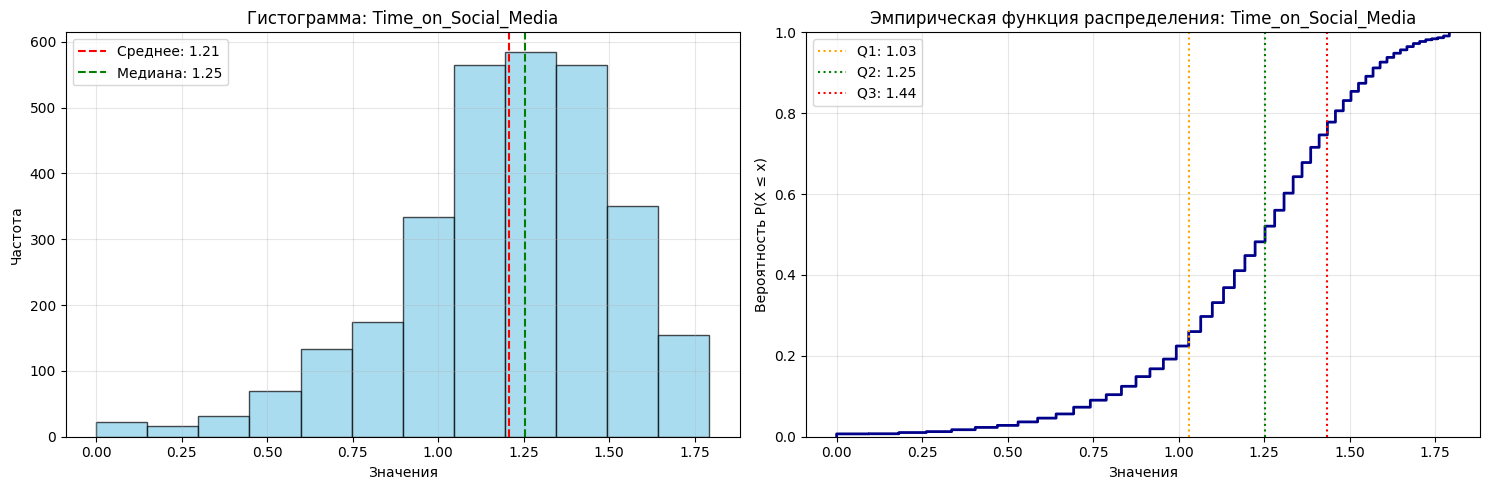

SQRT
СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для Time_on_Social_Media
Среднее:                    1.5420
Дисперсия:                  0.1214
Медиана:                    1.5811
Мода:                       1.6432
Квантиль 0.25:              1.3416
Квантиль 0.50 (медиана):    1.5811
Квантиль 0.75:              1.7889
Интерквартильный размах:    0.4472
Эксцесс (kurtosis):         2.0839
Асимметрия (skew):          -0.9129

ГРАФИКИ


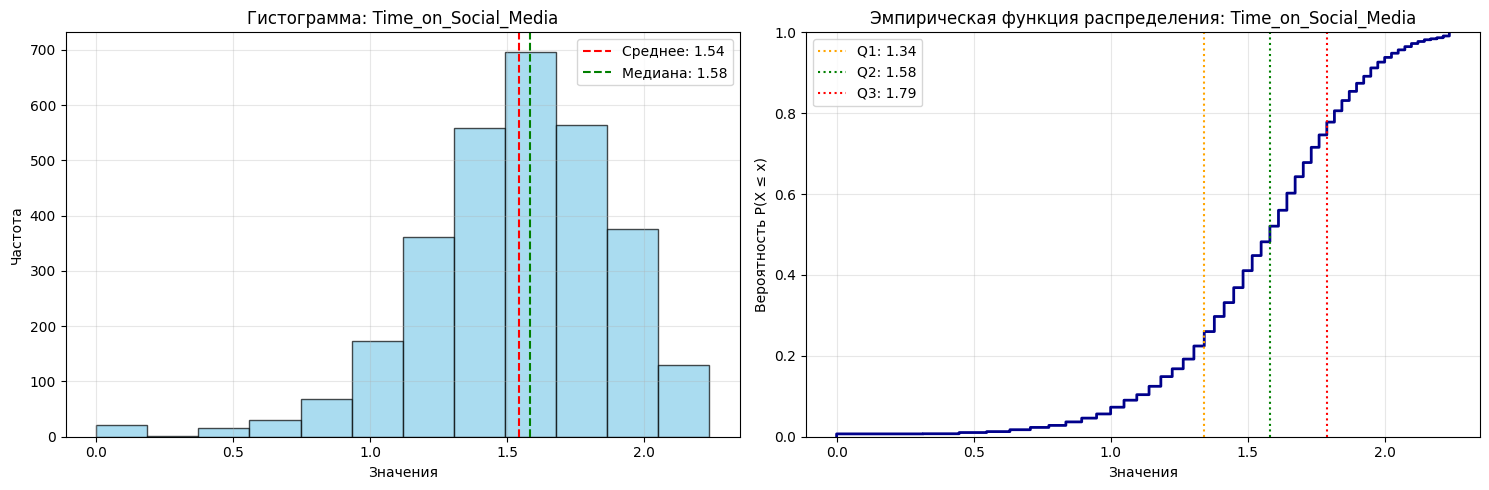

ARCSIN
СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для Time_on_Social_Media
Среднее:                    0.8572
Дисперсия:                  0.2536
Медиана:                    0.7754
Мода:                       1.5708
Квантиль 0.25:              0.5236
Квантиль 0.50 (медиана):    0.7754
Квантиль 0.75:              1.1198
Интерквартильный размах:    0.5962
Эксцесс (kurtosis):         -0.9963
Асимметрия (skew):          -0.0247

ГРАФИКИ


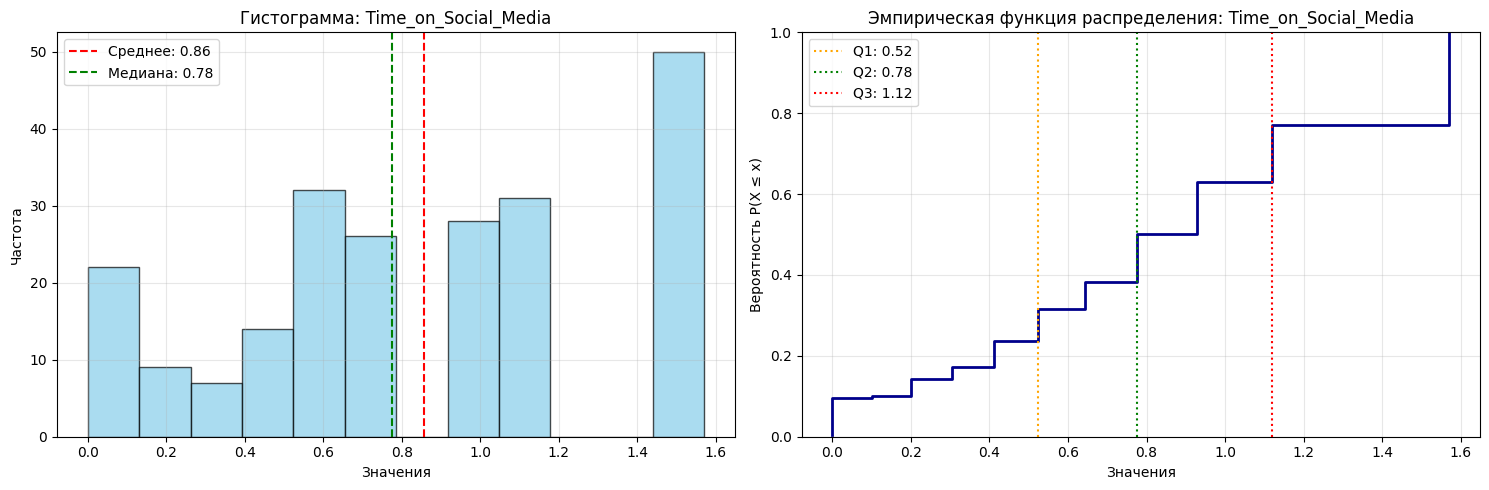

ARCSINH
СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для Time_on_Social_Media
Среднее:                    1.5781
Дисперсия:                  0.1713
Медиана:                    1.6472
Мода:                       1.7191
Квантиль 0.25:              1.3504
Квантиль 0.50 (медиана):    1.6472
Квантиль 0.75:              1.8799
Интерквартильный размах:    0.5294
Эксцесс (kurtosis):         1.3299
Асимметрия (skew):          -0.9762

ГРАФИКИ


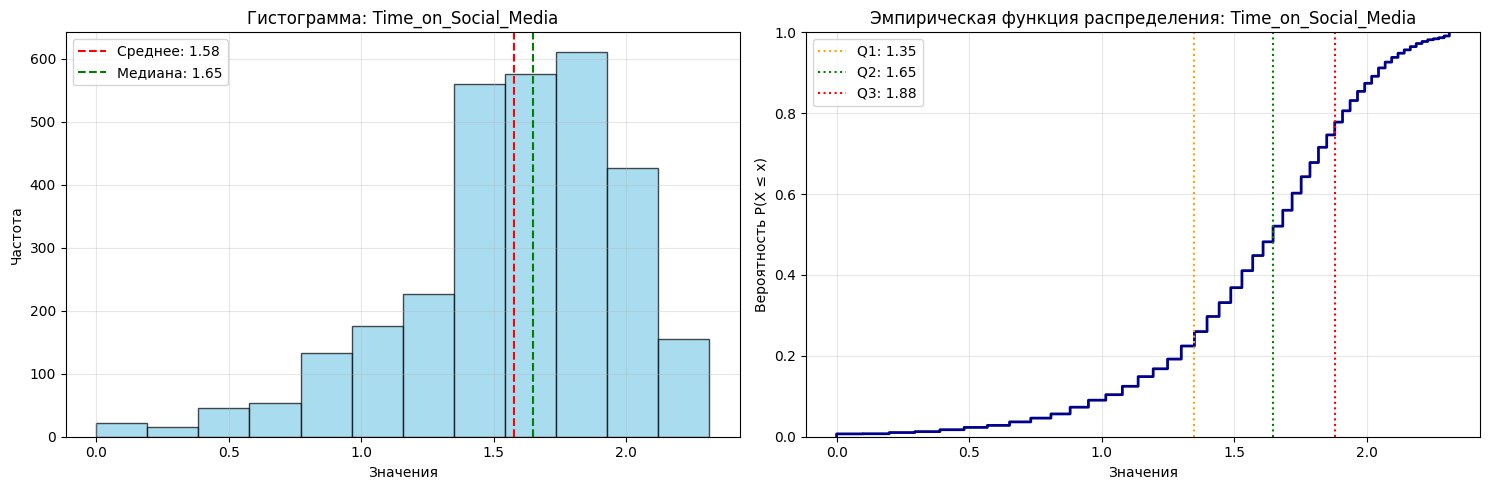

ARCTAN
СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для Time_on_Social_Media
Среднее:                    1.1307
Дисперсия:                  0.0446
Медиана:                    1.1903
Мода:                       1.2161
Квантиль 0.25:              1.0637
Квантиль 0.50 (медиана):    1.1903
Квантиль 0.75:              1.2679
Интерквартильный размах:    0.2042
Эксцесс (kurtosis):         7.3938
Асимметрия (skew):          -2.3208

ГРАФИКИ


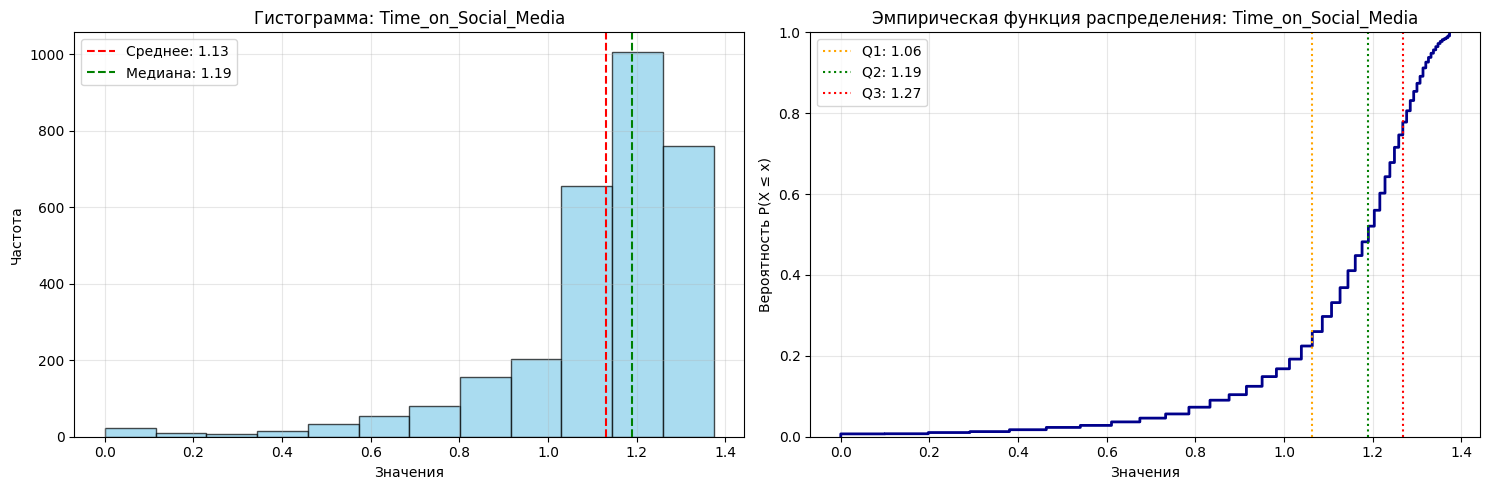

In [13]:
log_feat = np.log1p(feat)
sqrt_feat = np.sqrt(feat)
arcsin_feat = np.arcsin(feat)
arcsinh_feat = np.arcsinh(feat)
arctan_feat = np.arctan(feat)

print("LOG")
print_stats(log_feat)

print("SQRT")
print_stats(sqrt_feat)

print("ARCSIN")
print_stats(arcsin_feat)

print("ARCSINH")
print_stats(arcsinh_feat)

print("ARCTAN")
print_stats(arctan_feat)

#### Даже без проверки критериев нормальности, можно заметить, что ни одно из преобразований не привело к нормальному распределению, а только больше исказило распределение.

##### Как упоминалось ранее, хвосты распределения слишком тяжелые в сравнении с нормальным. Потому очевидно, что их обрезка уменьшит статистику хи-квадрат. Однако, кто мы такие, чтобы пренебрегать аутлаерами (а может это и не аутлаеры вовсе).

СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для Time_on_Social_Media
Среднее:                    2.4998
Дисперсия:                  0.9653
Медиана:                    2.5000
Мода:                       2.7000
Квантиль 0.25:              1.8000
Квантиль 0.50 (медиана):    2.5000
Квантиль 0.75:              3.2000
Интерквартильный размах:    1.4000
Эксцесс (kurtosis):         -0.2900
Асимметрия (skew):          0.0755

ГРАФИКИ


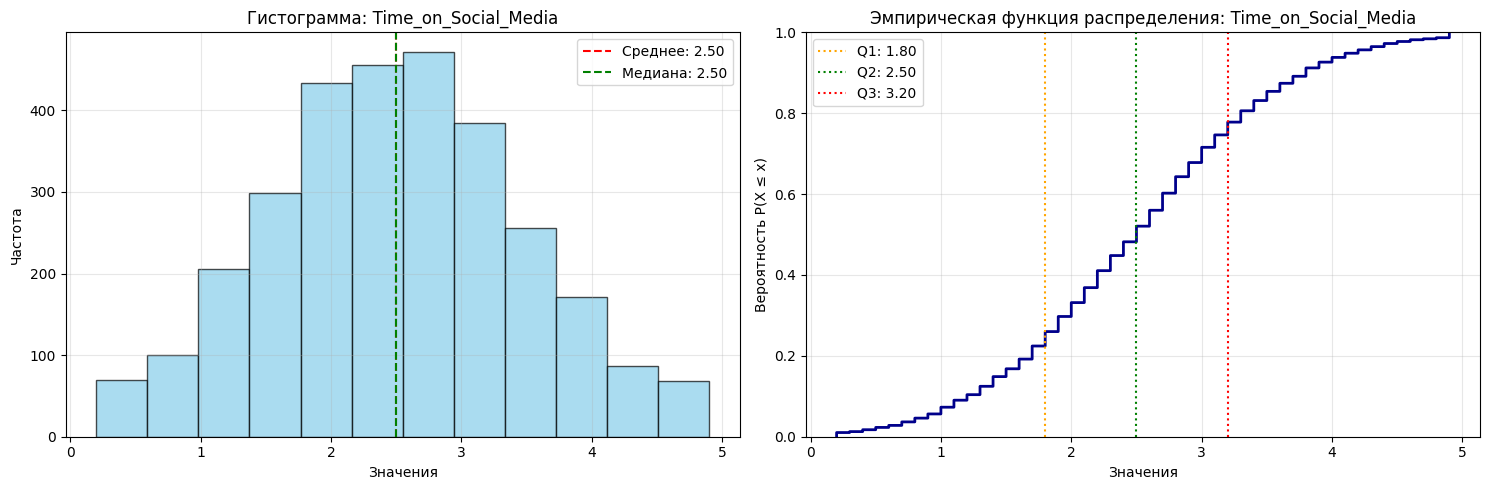

КРИТЕРИЙ ХИ-КВАДРАТ
Размер выборки: 3000
Выборочное среднее mu: 2.4998
Выборочное стандартное отклонение sigma: 0.9825

Количество интервалов после объединения: 12
Наблюдаемые частоты: [ 69 100 205 299 433 456 472 384 256 171  87  68]
Ожидаемые частоты: [ 49 106 194 305 409 469 460 385 276 169  88  40]

Статистика хи-квадрат: 32.4132
Степени свободы: 9
Критическое значение (alpha=0.05): 16.9190
p-value: 0.0002

Результат: Данные НЕ согласуются с нормальным распределением


{'chi_square': np.float64(32.41323470313846),
 'degrees_of_freedom': 9,
 'p_value': np.float64(0.0001688866089825103),
 'critical_value': np.float64(16.918977604620444),
 'is_normal': np.False_}

In [14]:
def winsorize_data(data, limits=(0.05, 0.05)):
    lower_limit = data.quantile(limits[0])
    upper_limit = data.quantile(1 - limits[1])
    return data.clip(lower=lower_limit, upper=upper_limit)

winsorized_feat = winsorize_data(feat, (0.01, 0.01))

print_stats(winsorized_feat)
chi_square_normality_test(winsorized_feat)

##### Даже после усечения хвостов критерий хи-квадрат отвергает $H_0$. По большей части это связано со смещенной модой, что подтверждается сопоставлением мощностей соответсвующх бинов гистограммы. И уже в этом случае, в самом деле, ни один метод не сможет таргетированно повлиять на эти сэмплы. 

---
#### Вернемся к исходному распределению признака. Оно, как было описано ранее, уже неплохо аппроксимируется нормальным, о чем свидетельствуют некоторые из проведенных статистических тестов. Потому я считаю, что дальнейшие преобразования не просто бессмысленны, а даже вредны для анализа признака и дальнейшего использования гауссовской теории. 


СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для Time_on_Social_Media
Среднее:                    2.4992
Дисперсия:                  0.9765
Медиана:                    2.5000
Мода:                       2.7000
Квантиль 0.25:              1.8000
Квантиль 0.50 (медиана):    2.5000
Квантиль 0.75:              3.2000
Интерквартильный размах:    1.4000
Эксцесс (kurtosis):         -0.2132
Асимметрия (skew):          0.0670

ГРАФИКИ


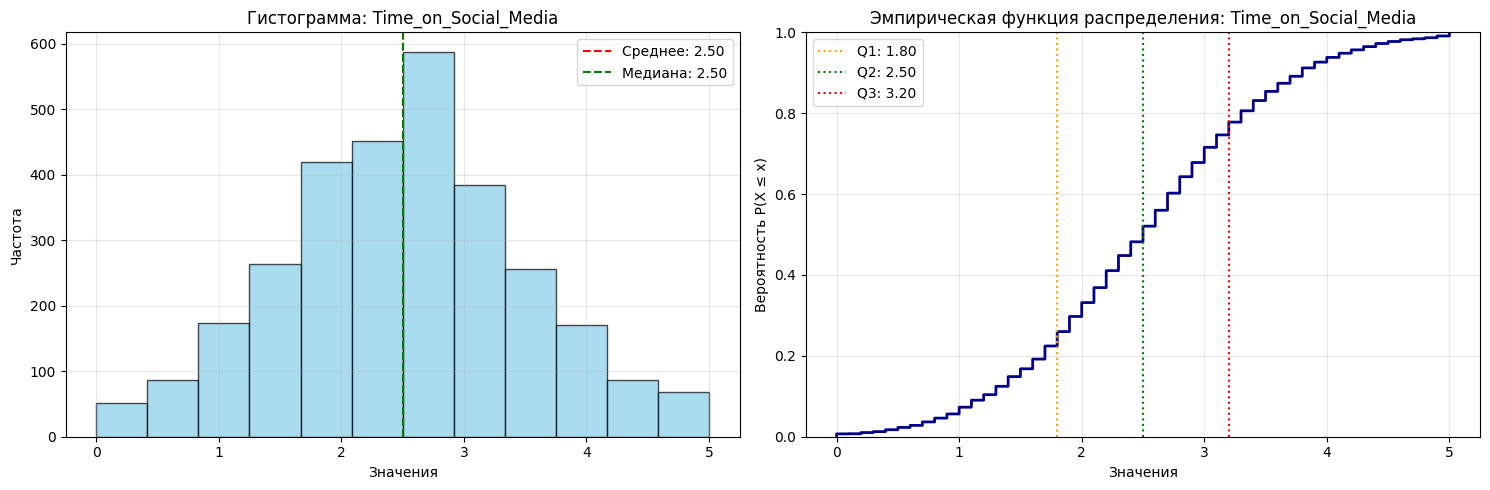

In [15]:
# Исходный признак
print_stats(feat)

## Задание 4

In [16]:
print("="*60)
print("АНАЛИЗ ПО ШКОЛЬНЫМ КЛАССАМ (School_Grade)")
print("="*60)

print("Доступные школьные классы:")
school_grades = df['School_Grade'].value_counts().sort_index()
print(school_grades)

print(f"\nВсего классов: {len(school_grades)}")
print(f"Общий размер выборки: {len(df)}")

grouped_data = df.groupby('School_Grade')[col]


АНАЛИЗ ПО ШКОЛЬНЫМ КЛАССАМ (School_Grade)
Доступные школьные классы:
School_Grade
10th    487
11th    479
12th    529
7th     497
8th     482
9th     526
Name: count, dtype: int64

Всего классов: 6
Общий размер выборки: 3000


In [17]:
print("\nСТАТИСТИКИ ПО КАЖДОМУ КЛАССУ:")
print("-" * 70)

stats_by_grade = []

print(f"{'Класс':<8} | {'Кол-во':<6} | {'Среднее':<8} | {'Дисперсия':<10} | {'Стд.откл':<10} | {'Медиана':<8}")
print("-" * 70)

for grade, group_data in grouped_data:
    count = len(group_data)
    mean_val = group_data.mean()
    var_val = group_data.var()
    std_val = group_data.std()
    median_val = group_data.median()
    
    stats_by_grade.append({
        'Grade': grade,
        'Count': count,
        'Mean': mean_val,
        'Variance': var_val,
        'Std': std_val,
        'Median': median_val
    })
    
    print(f"{grade:<8} | {count:<6} | {mean_val:<8.3f} | {var_val:<10.3f} | {std_val:<10.3f} | {median_val:<8.3f}")

stats_df = pd.DataFrame(stats_by_grade)

print(f"\nОБЩАЯ СТАТИСТИКА:")
print(f"Общее среднее: {df[col].mean():.4f}")
print(f"Общая дисперсия: {df[col].var():.4f}")
print(f"Межгрупповая дисперсия: {stats_df['Mean'].var():.4f}")
print(f"Средняя внутригрупповая дисперсия: {stats_df['Variance'].mean():.4f}")



СТАТИСТИКИ ПО КАЖДОМУ КЛАССУ:
----------------------------------------------------------------------
Класс    | Кол-во | Среднее  | Дисперсия  | Стд.откл   | Медиана 
----------------------------------------------------------------------
10th     | 487    | 2.524    | 0.923      | 0.961      | 2.500   
11th     | 479    | 2.488    | 0.946      | 0.973      | 2.500   
12th     | 529    | 2.464    | 1.014      | 1.007      | 2.400   
7th      | 497    | 2.540    | 0.920      | 0.959      | 2.600   
8th      | 482    | 2.470    | 1.030      | 1.015      | 2.500   
9th      | 526    | 2.510    | 1.026      | 1.013      | 2.500   

ОБЩАЯ СТАТИСТИКА:
Общее среднее: 2.4992
Общая дисперсия: 0.9765
Межгрупповая дисперсия: 0.0009
Средняя внутригрупповая дисперсия: 0.9764


ГИСТОГРАММЫ ПО КАЖДОМУ КЛАССУ


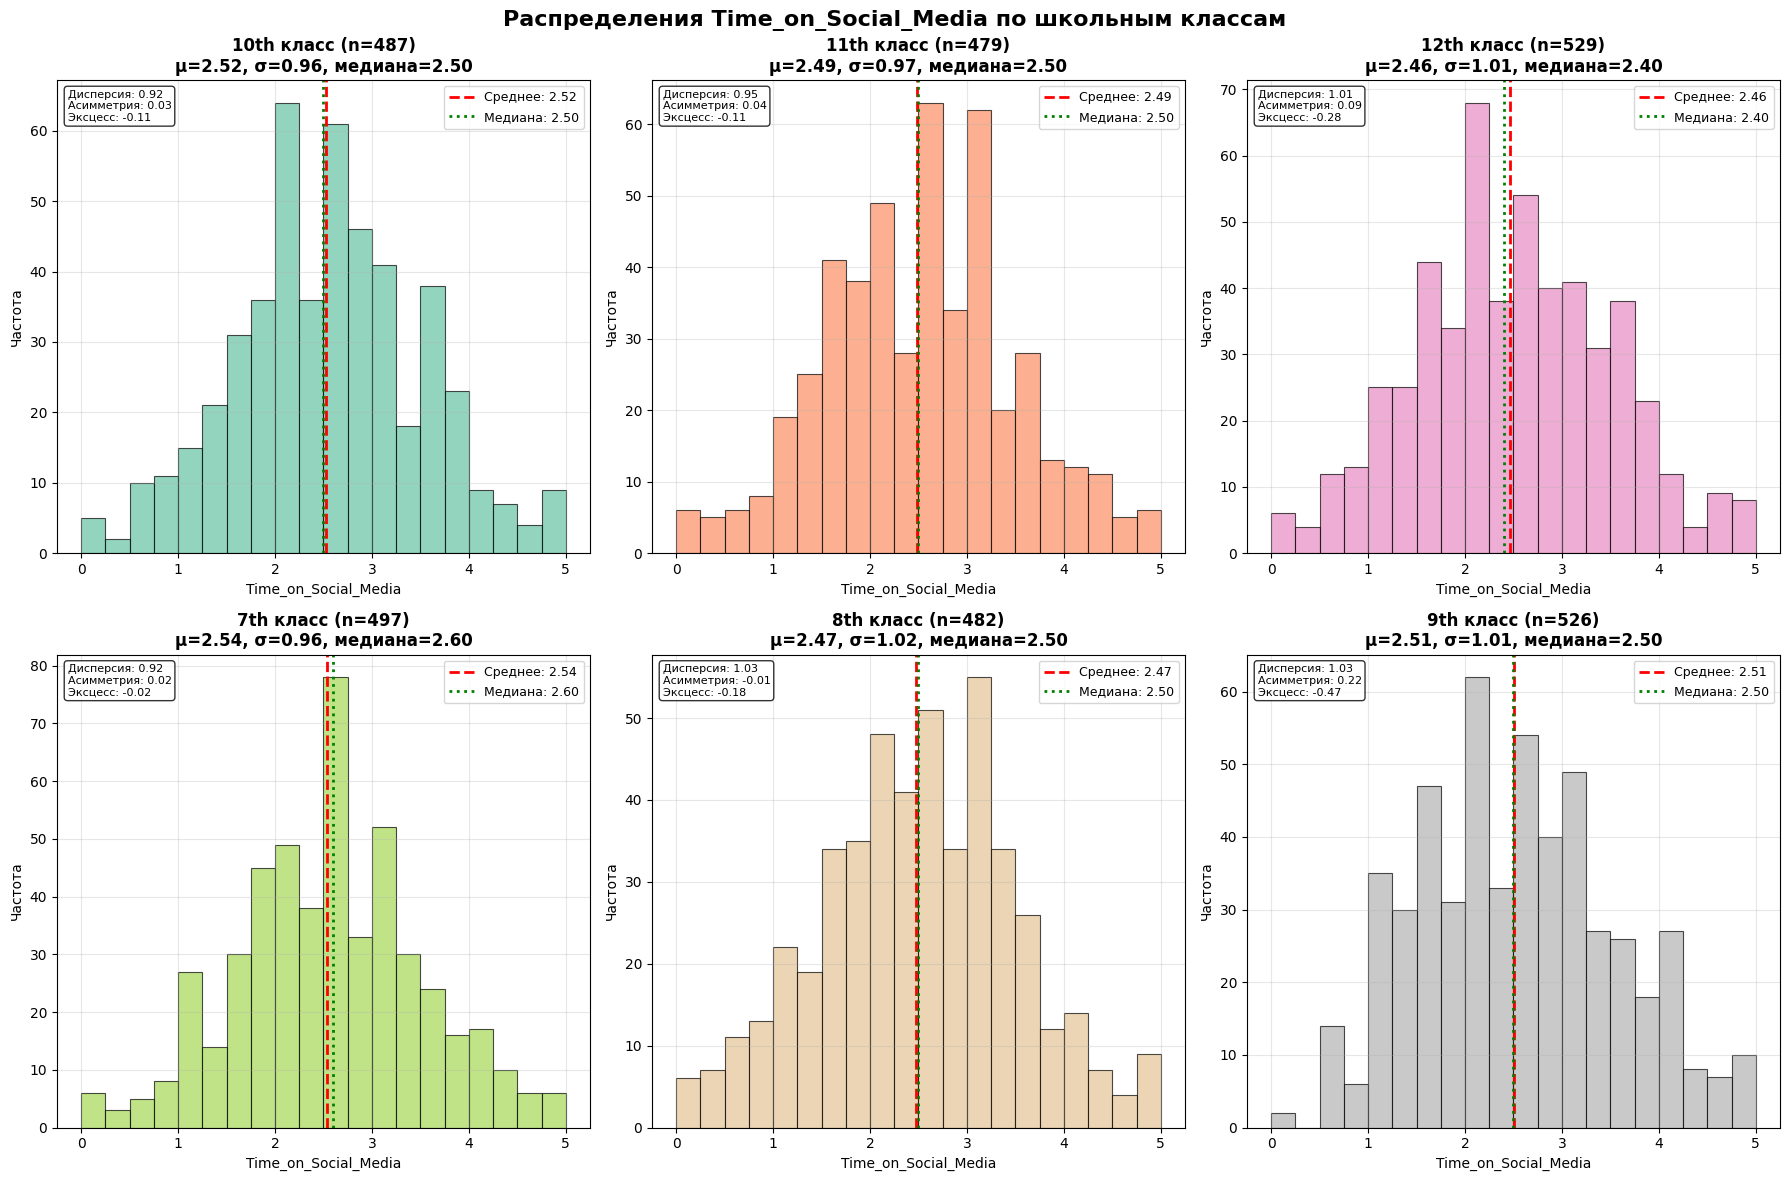

In [18]:
print("="*60)
print("ГИСТОГРАММЫ ПО КАЖДОМУ КЛАССУ")
print("="*60)

grades_list = list(grouped_data.groups.keys())
n_grades = len(grades_list)

colors = plt.cm.Set2(np.linspace(0, 1, n_grades))

n_cols = 3
n_rows = (n_grades + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))

if n_rows == 1 and n_cols > 1:
    axes = axes.reshape(1, -1)
elif n_rows > 1 and n_cols == 1:
    axes = axes.reshape(-1, 1)
elif n_rows == 1 and n_cols == 1:
    axes = np.array([[axes]])

overall_min = df[col].min()
overall_max = df[col].max()
bins_range = (overall_min, overall_max)

for i, (grade, group_data) in enumerate(grouped_data):
    row = i // n_cols
    col_idx = i % n_cols
    
    if n_rows == 1 and n_cols == 1:
        ax = axes[0, 0]
    else:
        ax = axes[row, col_idx]
    
    n_values, bins, patches = ax.hist(group_data, bins=20, 
                                     alpha=0.7, color=colors[i], 
                                     edgecolor='black', linewidth=0.8,
                                     range=bins_range)
    
    mean_val = group_data.mean()
    std_val = group_data.std()
    median_val = group_data.median()
    count = len(group_data)
    
    ax.set_title(f'{grade} класс (n={count})\n'
                f'μ={mean_val:.2f}, σ={std_val:.2f}, медиана={median_val:.2f}', 
                fontsize=12, fontweight='bold')
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
               label=f'Среднее: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=2, 
               label=f'Медиана: {median_val:.2f}')
    
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Частота')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    
    ax.text(0.02, 0.98, f'Дисперсия: {group_data.var():.2f}\n'
                        f'Асимметрия: {group_data.skew():.2f}\n'
                        f'Эксцесс: {group_data.kurtosis():.2f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
            fontsize=8)

for i in range(n_grades, n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    if n_rows == 1 and n_cols == 1:
        break
    axes[row, col_idx].remove()

plt.suptitle(f'Распределения {col} по школьным классам', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


##### Как видно, статистики распределений всех групп очень схожи по значениям. В целом, внутригрупповые среднее и медиана каждой группы практически совпадают со средним и медианой всей выборки. Также для всех групп (кроме 8 класса, однако для него As наиболее близок к нулю) характерно небольшое смещение распределения влево, о чем свидетельствует отрицательный коэффициент асимметрии, впрочем, как и у всей выборки в целом. Также важно отметить, что размеры групп примерно одинаковые, что не препятствует формированию выводов о схожести распределений групп. 